## *Google Colab link:*
https://colab.research.google.com/drive/1F8iGXQvpwz40dm6SV7GO-E0Kn3TpblOL?usp=sharing

# Data Preprocessing

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
df=pd.read_csv('Bank_Loan_Granting.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


### Check Data Condition

In [4]:
df.shape

(5000, 14)

Terdapat 5000 baris dan 14 kolom

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


Dari hasil diatas, beberapa kesimpulan yang bisa kita tarik ialah:
1. Tidak terdapat missing values pada data.
2. Dapat kita lihat bahwa semua kolom memili tipe data berupa numerik kecuali untuk 'CCAvg' dimana berupa objek.

From above, we can see that:
1. There are no missing values, because all columns have a non-null count of 5000.
2. Most columns contain numerical data except for the 'CCAvg' column, which has an object data type. However, we may need to be converted to numerical data type for further analysis or modeling.

### Knowing data

In [8]:
value_counts = {}
for col in df.columns:
    value_counts[col] = df[col].value_counts()

# Tampilkan hasil value_counts untuk setiap kolom
for col, counts in value_counts.items():
    print(f"\nValue Counts for Column '{col}':")
    print(counts)


Value Counts for Column 'ID':
ID
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, Length: 5000, dtype: int64

Value Counts for Column 'Age':
Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64

Value Counts for Column 'Experience':
Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 

As we can see, all data values looks normal, except for experience.
In Experience column, there are some values that show '-1', '-2', and '-3'. These values don't make sense since we are talking about **year**

In [9]:
df['Experience'].value_counts()

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64

## Feature Transforming


### CCAvg column
We are going to change CCAvg column from categorical into numerical

In [10]:
# Changing the '/' into '.'
df['CCAvg'] = df['CCAvg'].apply(lambda x: eval(x.replace('/', '.')))

I want to change the '1/60' into '1.60'

Therefore, I use x.replace() to replace the '/' character with '.' in each element.

In [11]:
# Change 'CCAvg' data type into float
df['CCAvg'] = df['CCAvg'].astype(float)

In [12]:
# Print new 'CCAvg'
print(df['CCAvg'])

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64


In [13]:
# Check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


As we can see, the CCAvg already chance into numerical value and has no missing values

### Experience
We are going to change values that unnormal

In [14]:
# Convert 'Experience' column to string first
df['Experience'] = df['Experience'].astype(str)

In [15]:
# Replace specific values in 'Experience' column
replace_dict = {'-1': '1', '-2': '2', '-3': '3'}
df['Experience'] = df['Experience'].replace(replace_dict)


In [16]:
# Convert 'Experience' column back to numeric
df['Experience'] = pd.to_numeric(df['Experience'])

In [17]:
df['Experience'].value_counts()

Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: count, dtype: int64

As you can see, there are no more unnormal values

# **Question A**
Dataset yang diberikan memiliki beberapa problem, lakukan **praproses data**
untuk menyelesaikan problem dari data tersebut. Sebutkan problem apa saja yang kalian
temukan dari data yang diberikan, berikan penjelasan mengenai pendekatan apa yang kalian
gunakan dan kenapa memilih pendekatan yang dipilih?

Jawaban:

Dari praproses data yang telah dilakukan, problem yang saya temukan ialah:

1. Pada kolom CCAvg, tipe data merupakan object, tetapi value data adalah numerik. Untuk itu saya melakukan **Data Transforming**, dimana saya mengubah data yang awalnya kategorikal menjadi data numerik, sesuai yang saya harapkan. Saya juga mengubah data yang awalnya seperti '1/60' menjadi '1.60'
2. Pada kolom Experience, terdapat data yang menurut saya tidak normal, karena ketika data tentang tahun, harusnya tidak bisa bernilai negatif. Namun pada kolom ini terdapat nilai negatif yaitu -1, -2, dan -3. Untuk itu saya melakukan **Data Transforming**, dimana saya mengubah -1, -2, -3 menjadi 1, 2, 3, dengan menghilang tanda '-' didepannya



## (Continue data preprocessing) Drop variable that we don't need for modeling


In [18]:
# Using df.drop to drop irrelevant and variables that contains unique values
df = df.drop(['ID', 'ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# **Question B**
Lakukan eksplorasi data terlebih dahulu untuk memahami permasalahan
yang dihadapi terlebih dahulu. Selanjutnya pisahkan dataset menjadi train, test dan validation
set dengan ketentuan (80 train, 10 val, 10 test)

Jawaban:
(Jawaban berada di code dibawah)

## Data Splitting
Split Data into Train, Test, and Validate Data

In [19]:
from sklearn.model_selection import train_test_split

# Memisahkan input (X) dan target (y)
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

# Memisahkan dataset menjadi train, validation, dan test set
# Proporsi (80% train, 10% validation, 10% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

# Melihat jumlah data dalam setiap set
print(f"Jumlah data dalam train set: {len(X_train)}")
print(f"Jumlah data dalam validation set: {len(X_val)}")
print(f"Jumlah data dalam test set: {len(X_test)}")

Jumlah data dalam train set: 4000
Jumlah data dalam validation set: 500
Jumlah data dalam test set: 500


In [20]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2619,33,8,62,3,2.3,1,98,0,0,0,1
4918,50,25,42,2,0.7,2,110,0,0,0,1
1678,56,30,73,2,1.1,1,0,0,0,0,0
3221,40,16,44,1,1.8,1,0,1,0,1,0
1291,58,34,44,4,2.2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
337,57,27,68,1,1.4,3,0,0,0,1,0
150,46,22,118,2,7.5,1,0,0,1,1,1
4661,43,19,129,1,5.0,1,0,1,0,1,0
3812,39,13,52,1,2.0,1,0,0,0,0,1


In [21]:
y_test

1501    0
2586    1
2653    0
1055    0
705     0
       ..
3928    0
544     0
367     0
1612    0
3550    0
Name: Personal Loan, Length: 500, dtype: int64

# **Question C**

Identifikasikan tantangan dan kesulitan dari data tabular yang diberikan.
Hal ini terkait dengan Kualitas Data (Data Kotor dan Hilang, Outliers), Jenis Data (Heterogenitas
Fitur, Encoding Fitur Kategorikal, Skala dan Normalisasi) dan Ketidakseimbangan Kelas (Class
Imbalance).


Jawaban:

Tantangan yang saya hadapi ialah:
1. **Adanya data yang mempunyai tipe data yang tidak sesuai (terdapat pada kolom 'CCAvg')**
2. **Adanya outliers pada data**

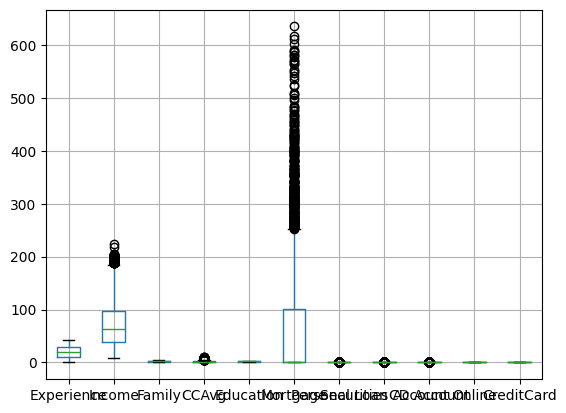

In [22]:
# Check outliers
import matplotlib.pyplot as plt
box_plot = df.boxplot(column=['Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'])
plt.show()

3. **Adanya class imbalance**

In [23]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5530973451327433, 1: 5.208333333333333}



Bobot kelas yang dihasilkan adalah sebagai berikut:

- Kelas 0 memiliki bobot 0.5530973451327433.
- Kelas 1 memiliki bobot 5.208333333333333.

Dari nilai bobot kelas tersebut, kita dapat melihat bahwa terdapat ketidakseimbangan yang signifikan antara kelas 0 dan kelas 1. Kelas 1 memiliki bobot yang jauh lebih tinggi

Notes:
Code ini di run setelah split di run

4. **Butuh Normalisasi data**

In [24]:
# Hitung standar deviasi untuk setiap fitur
std_dev = np.std(df, axis=0)
print(f"standar deviasi: \n{std_dev}\n")

standar deviasi: 
Age                    11.462019
Experience             11.414048
Income                 46.029126
Family                  1.147548
CCAvg                   1.747484
Education               0.839785
Mortgage              101.703630
Personal Loan           0.294591
Securities Account      0.305779
CD Account              0.238226
Online                  0.490540
CreditCard              0.455592
dtype: float64



In [25]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2619,33,8,62,3,2.3,1,98,0,0,0,1
4918,50,25,42,2,0.7,2,110,0,0,0,1
1678,56,30,73,2,1.1,1,0,0,0,0,0
3221,40,16,44,1,1.8,1,0,1,0,1,0
1291,58,34,44,4,2.2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
337,57,27,68,1,1.4,3,0,0,0,1,0
150,46,22,118,2,7.5,1,0,0,1,1,1
4661,43,19,129,1,5.0,1,0,1,0,1,0
3812,39,13,52,1,2.0,1,0,0,0,0,1


In [26]:
# Tentukan threshold untuk standar deviasi
threshold = 10

# Periksa apakah ada fitur dengan standar deviasi di atas threshold
need_scaling = np.any(std_dev > threshold)

if need_scaling:
    print("Data perlu di scaling")
else:
    print("Data tidak perlu di scaling")

Data perlu di scaling


Dari beberapa code diatas, menunjukkan bahwa fitur-fitur dalam data memiliki skala yang berbeda-beda atau jauh sehingga memerlukan normalisasi

**Notes tambahan**:
Beberapa data ada yang berbentuk klasifikasi, tetapi karena sudah dalam bentuk binary yaitu (0 atau 1), jadi tidak memerlukan feature engineering / encoding

# **Question D**
Buatlah arsitektur baseline dengan n nodes input layer, 2 buah hidden layer
dengan banyak 2 × n nodes awal dan layer akhir banyak kelas nya (n, 2 × n, 2 × n, num_class).
Keterangan: n adalah banyak input dan num_class adalah banyak kelas. Activation function
untuk tiap hidden layer menggunakan ReLU

In [27]:
X_train.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

There are 11 columns that we will input

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the parameters
n = 11  # Number of input nodes
num_classes = 1  # Number of output classes ( 0 or 1)

# Initialize the Sequential model
model = Sequential()

# Add the first hidden layer with 2 * n nodes and ReLU activation
model.add(Dense(2 * n, activation='relu'))

# Add the second hidden layer with 2 * n nodes and ReLU activation
model.add(Dense(2 * n, activation='relu'))

# Add the output layer with num_classes nodes (2 nodes for binary classification) and sigmoid activation
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer="adam",loss='mse',metrics=[keras.metrics.RootMeanSquaredError(), 'mae', 'mape'])

# Build the model to prepare for summary
model.build((None, n))

# Display the model architecture summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                264       
                                                                 
 dense_1 (Dense)             (None, 22)                506       
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 793 (3.10 KB)
Trainable params: 793 (3.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Total params:
1. Input layer = 11
2. Hidden 1 = 22
3. Hidden 2 = 22
4. Output = 1

**Perhitungan**

11 x 22 = 242

22 x 22 = 484

22 x 1 = 22

242 + 484 + 44 = 748

748 + 22 + 22 + 1 = 793

In [29]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=2)

Epoch 1/20
125/125 - 4s - loss: 4.1858 - accuracy: 0.7143 - val_loss: 0.5041 - val_accuracy: 0.8880 - 4s/epoch - 33ms/step
Epoch 2/20
125/125 - 1s - loss: 0.3771 - accuracy: 0.8737 - val_loss: 0.3037 - val_accuracy: 0.8780 - 610ms/epoch - 5ms/step
Epoch 3/20
125/125 - 1s - loss: 0.2883 - accuracy: 0.8873 - val_loss: 0.2444 - val_accuracy: 0.8860 - 664ms/epoch - 5ms/step
Epoch 4/20
125/125 - 1s - loss: 0.2507 - accuracy: 0.8980 - val_loss: 0.2838 - val_accuracy: 0.8780 - 542ms/epoch - 4ms/step
Epoch 5/20
125/125 - 1s - loss: 0.2586 - accuracy: 0.8940 - val_loss: 0.2147 - val_accuracy: 0.9120 - 773ms/epoch - 6ms/step
Epoch 6/20
125/125 - 1s - loss: 0.2475 - accuracy: 0.9018 - val_loss: 0.2279 - val_accuracy: 0.8860 - 669ms/epoch - 5ms/step
Epoch 7/20
125/125 - 1s - loss: 0.2423 - accuracy: 0.9007 - val_loss: 0.2040 - val_accuracy: 0.9100 - 900ms/epoch - 7ms/step
Epoch 8/20
125/125 - 1s - loss: 0.2364 - accuracy: 0.9065 - val_loss: 0.1869 - val_accuracy: 0.9200 - 1s/epoch - 11ms/step
Epoc

In [30]:
from sklearn.metrics import classification_report

# Predict labels for training data
y_train_pred = model.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype(int)

# Predict labels for validation data
y_val_pred = model.predict(X_val)
y_val_pred_class = (y_val_pred > 0.5).astype(int)

# Predict labels for test data
y_test_pred = model.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

16/16 [==============================] - 0s 2ms/step


Notes:
`y_test_pred_class = (y_test_pred > 0.5).astype(int) ` digunakan untuk mengonversi probabilitas prediksi menjadi kelas biner. Dalam konteks ini, jika probabilitas prediksi lebih besar dari 0.5, itu dianggap sebagai kelas 1, dan jika probabilitasnya kurang dari atau sama dengan 0.5, itu dianggap sebagai kelas 0.

In [31]:
# Display evaluation results for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_class))

# Display evaluation results for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val, y_val_pred_class))

# Display evaluation results for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_class))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3616
           1       0.83      0.35      0.49       384

    accuracy                           0.93      4000
   macro avg       0.88      0.67      0.73      4000
weighted avg       0.93      0.93      0.92      4000

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       458
           1       0.67      0.29      0.40        42

    accuracy                           0.93       500
   macro avg       0.80      0.64      0.68       500
weighted avg       0.91      0.93      0.91       500

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       446
           1       0.84      0.39      0.53        54

    accuracy                           0.93       500
   macr

From above, we know that:

1. **Training Data Evaluation**:
   - Akurasi: 93% atau 0,93
   - Presisi (Kelas 0): 0,94
   - Recall (Kelas 0): 0,99
   - Skor F1 (Kelas 0): 0,96
   - Presisi (Kelas 1): 0,83
   - Recall (Kelas 1): 0,35
   - Skor F1 (Kelas 1): 0,49

2. **Validation Data Evaluation**:
   - Akurasi: 93% atau 0,93
   - Presisi (Kelas 0): 0,94
   - Recall (Kelas 0): 0,99
   - Skor F1 (Kelas 0): 0,96
   - Presisi (Kelas 1): 0,67
   - Recall (Kelas 1): 0,29
   - Skor F1 (Kelas 1): 0,40

3. **Test Data Evaluation**:
   - Akurasi: 93% atau 0,93
   - Presisi (Kelas 0): 0,93
   - Recall (Kelas 0): 0,99
   - Skor F1 (Kelas 0): 0,96
   - Presisi (Kelas 1): 0,84
   - Recall (Kelas 1): 0,39
   - Skor F1 (Kelas 1): 0,53


# **Question E**
Setelah mengetahui hasil dari nomor (1d), modifikasi arsitektur
tersebutuntuk mendapatkan nilai akurasi optimal yang kalian dapatkan (kalian dapat
menambahkan atau mengurangi arsitektur tersebut, atau mengganti hyperparameter, atau
menggunakan tuning pada hyperparameter). Jelaskan alasan kalian untuk menggunakan
pendekatan yang kalian pilih terkait dengan tantangan dan dan kesulitan yang dihadapi dalam
data tabular tersebut (1c).

Jawaban:

Kesulitan yang dihadapi adalah adanya class imbalance dan butuh normalisasi. Untuk itu saya akan melakukan scaling dengan min-max scaler dan class imbalace saya atasi dengan menghitung bobot kelas

## Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler ke data training dan transformasi data training, validasi, dan test
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[0.22727273, 0.18604651, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.61363636, 0.58139535, 0.15740741, ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.69767442, 0.30092593, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.45454545, 0.44186047, 0.56018519, ..., 0.        , 1.        ,
        0.        ],
       [0.36363636, 0.30232558, 0.2037037 , ..., 0.        , 0.        ,
        1.        ],
       [0.84090909, 0.81395349, 0.6712963 , ..., 0.        , 0.        ,
        1.        ]])

## Model 2: Scaling + add weight

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report


# Copy the data for training, validation, and test
X_train1, X_val1, X_test1 = X_train.copy(), X_val.copy(), X_test.copy()
y_train1, y_val1, y_test1 = y_train.copy(), y_val.copy(), y_test.copy()

# Calculate class weights to address data imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train1), y=y_train1)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Definisikan parameter
n = 11  # Banyaknya input
num_classes = 1  # Banyaknya kelas (0 atau 1)

# Inisialisasi model Sequential
model0 = Sequential()

# Add two hidden layers with the number of nodes = 2 * n and ReLU activation
model0.add(Dense(2 * n, activation='relu'))
model0.add(Dense(2 * n, activation='relu'))

# Add an output layer with the number of nodes = num_classes and sigmoid activation
model0.add(Dense(num_classes, activation='sigmoid'))

# # Compile the model - yang lama
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile the model with a lower learning rate
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.0001)
# model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Build the model to prepare for summary
model0.build((None, n))

# Display the model architecture summary
model0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 22)                264       
                                                                 
 dense_4 (Dense)             (None, 22)                506       
                                                                 
 dense_5 (Dense)             (None, 1)                 23        
                                                                 
Total params: 793 (3.10 KB)
Trainable params: 793 (3.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Train the model using validation data and class weights
model0.fit(X_train1, y_train1, epochs=20, batch_size=32, validation_data=(X_val1, y_val1), verbose=2, class_weight=class_weights_dict)

# model1.fit(X_train_copy, y_train_copy, epochs=50, batch_size=64, validation_data=(X_val_copy, y_val_copy), verbose=2, class_weight=class_weights_dict)

Epoch 1/20
125/125 - 1s - loss: 0.6581 - accuracy: 0.6110 - val_loss: 0.6594 - val_accuracy: 0.6600 - 1s/epoch - 11ms/step
Epoch 2/20
125/125 - 0s - loss: 0.5082 - accuracy: 0.8177 - val_loss: 0.4108 - val_accuracy: 0.8560 - 326ms/epoch - 3ms/step
Epoch 3/20
125/125 - 0s - loss: 0.3423 - accuracy: 0.8733 - val_loss: 0.3273 - val_accuracy: 0.8720 - 400ms/epoch - 3ms/step
Epoch 4/20
125/125 - 0s - loss: 0.2574 - accuracy: 0.9005 - val_loss: 0.2835 - val_accuracy: 0.8840 - 428ms/epoch - 3ms/step
Epoch 5/20
125/125 - 0s - loss: 0.2160 - accuracy: 0.9140 - val_loss: 0.2413 - val_accuracy: 0.9020 - 385ms/epoch - 3ms/step
Epoch 6/20
125/125 - 0s - loss: 0.1906 - accuracy: 0.9240 - val_loss: 0.2261 - val_accuracy: 0.9020 - 391ms/epoch - 3ms/step
Epoch 7/20
125/125 - 0s - loss: 0.1731 - accuracy: 0.9362 - val_loss: 0.2602 - val_accuracy: 0.8920 - 379ms/epoch - 3ms/step
Epoch 8/20
125/125 - 0s - loss: 0.1656 - accuracy: 0.9375 - val_loss: 0.1519 - val_accuracy: 0.9320 - 407ms/epoch - 3ms/step
Ep

In [37]:
from sklearn.metrics import classification_report

# Predict classes for training data
y_train_pred_class0 = (model0.predict(X_train1) > 0.5).astype(int)

# Predict classes for validation data
y_val_pred_class0 = (model0.predict(X_val1) > 0.5).astype(int)

# Predict classes for test data
y_test_pred_class0 = (model0.predict(X_test1) > 0.5).astype(int)

# Display classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train1, y_train_pred_class0))

# Display classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val1, y_val_pred_class0))

# Display classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test1, y_test_pred_class0))


16/16 [==============================] - 0s 2ms/step
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3616
           1       0.78      0.96      0.86       384

    accuracy                           0.97      4000
   macro avg       0.89      0.96      0.92      4000
weighted avg       0.97      0.97      0.97      4000

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       458
           1       0.66      0.93      0.77        42

    accuracy                           0.95       500
   macro avg       0.83      0.94      0.87       500
weighted avg       0.97      0.95      0.96       500

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       446
           1       0.79      0.96      0.87        54

    accu

From result above, we know that:

1. **Training Data Evaluation**:
   - Akurasi: 97% atau 0,97
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,97
   - Skor F1 (Kelas 0): 0,98
   - Presisi (Kelas 1): 0,78
   - Recall (Kelas 1): 0,96
   - Skor F1 (Kelas 1): 0,86

2. **Validation Data Evaluation**:
   - Akurasi: 95% atau 0,95
   - Presisi (Kelas 0): 0,99
   - Recall (Kelas 0): 0,96
   - Skor F1 (Kelas 0): 0,97
   - Presisi (Kelas 1): 0,66
   - Recall (Kelas 1): 0,93
   - Skor F1 (Kelas 1): 0,77

3. **Test Data Evaluation**:
   - Akurasi: 97% atau 0,97
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,97
   - Skor F1 (Kelas 0): 0,98
   - Presisi (Kelas 1): 0,79
   - Recall (Kelas 1): 0,96
   - Skor F1 (Kelas 1): 0,87



Model ini menunjukkan kemajuan yang signifikan dalam mengklasifikasikan kelas minoritas (Kelas 1) dibandingkan dengan Model 1, dengan nilai recall, presisi, dan skor F1 yang lebih tinggi untuk Kelas 1. Hal ini menunjukkan bahwa penggunaan strategi penyesuaian bobot kelas (add weight) berhasil meningkatkan kemampuan model dalam mengenali dan memprediksi kelas minoritas dengan lebih baik.

## Model 3: Scaling + add weight + Changing hyperparameter with adding hidden layer

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# Copy the data for training, validation, and test
X_train_copy, X_val_copy, X_test_copy = X_train.copy(), X_val.copy(), X_test.copy()
y_train_copy, y_val_copy, y_test_copy = y_train.copy(), y_val.copy(), y_test.copy()

# Calculate class weights to address data imbalance
class_weights1 = compute_class_weight('balanced', classes=np.unique(y_train_copy), y=y_train_copy)
class_weights_dict1 = {i: class_weights1[i] for i in range(len(class_weights1))}

# Definisikan parameter
n = 11  # Banyaknya input
num_classes = 1  # Banyaknya kelas (0 atau 1)

# Inisialisasi model Sequential
model1 = Sequential()

# Add two hidden layers with the number of nodes = 2 * n and ReLU activation
model1.add(Dense(2 * n, activation='relu'))
model1.add(Dense(2 * n, activation='relu'))

# Add a new layer with more nodes
model1.add(Dense(2 * n, activation='relu'))
model1.add(Dense(2 * n, activation='relu'))

# Add an output layer with the number of nodes = num_classes and sigmoid activation
model1.add(Dense(num_classes, activation='sigmoid'))

# # Compile the model - yang lama
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile the model with a lower learning rate
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.0001)
# model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Build the model to prepare for summary
model1.build((None, n))

# Display the model architecture summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 22)                264       
                                                                 
 dense_7 (Dense)             (None, 22)                506       
                                                                 
 dense_8 (Dense)             (None, 22)                506       
                                                                 
 dense_9 (Dense)             (None, 22)                506       
                                                                 
 dense_10 (Dense)            (None, 1)                 23        
                                                                 
Total params: 1805 (7.05 KB)
Trainable params: 1805 (7.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Train the model using validation data and class weights
model1.fit(X_train_copy, y_train_copy, epochs=20, batch_size=32, validation_data=(X_val_copy, y_val_copy), verbose=2, class_weight=class_weights_dict1)

Epoch 1/20
125/125 - 2s - loss: 0.6203 - accuracy: 0.6270 - val_loss: 0.4547 - val_accuracy: 0.8680 - 2s/epoch - 15ms/step
Epoch 2/20
125/125 - 0s - loss: 0.2963 - accuracy: 0.8783 - val_loss: 0.1979 - val_accuracy: 0.9300 - 365ms/epoch - 3ms/step
Epoch 3/20
125/125 - 0s - loss: 0.1925 - accuracy: 0.9215 - val_loss: 0.1255 - val_accuracy: 0.9600 - 375ms/epoch - 3ms/step
Epoch 4/20
125/125 - 0s - loss: 0.1804 - accuracy: 0.9323 - val_loss: 0.2413 - val_accuracy: 0.8960 - 386ms/epoch - 3ms/step
Epoch 5/20
125/125 - 0s - loss: 0.1570 - accuracy: 0.9460 - val_loss: 0.1320 - val_accuracy: 0.9500 - 350ms/epoch - 3ms/step
Epoch 6/20
125/125 - 0s - loss: 0.1514 - accuracy: 0.9467 - val_loss: 0.1379 - val_accuracy: 0.9460 - 423ms/epoch - 3ms/step
Epoch 7/20
125/125 - 0s - loss: 0.1424 - accuracy: 0.9507 - val_loss: 0.2260 - val_accuracy: 0.9100 - 373ms/epoch - 3ms/step
Epoch 8/20
125/125 - 0s - loss: 0.1372 - accuracy: 0.9572 - val_loss: 0.1396 - val_accuracy: 0.9480 - 416ms/epoch - 3ms/step
Ep

In [40]:
from sklearn.metrics import classification_report

# Predict classes for training data
y_train_pred_class1 = (model1.predict(X_train_copy) > 0.5).astype(int)

# Predict classes for validation data
y_val_pred_class1 = (model1.predict(X_val_copy) > 0.5).astype(int)

# Predict classes for test data
y_test_pred_class1 = (model1.predict(X_test_copy) > 0.5).astype(int)

# Display classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train_copy, y_train_pred_class1))

# Display classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val_copy, y_val_pred_class1))

# Display classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test_copy, y_test_pred_class1))


16/16 [==============================] - 0s 3ms/step
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3616
           1       0.70      0.98      0.81       384

    accuracy                           0.96      4000
   macro avg       0.85      0.97      0.90      4000
weighted avg       0.97      0.96      0.96      4000

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       458
           1       0.57      0.93      0.70        42

    accuracy                           0.93       500
   macro avg       0.78      0.93      0.83       500
weighted avg       0.96      0.93      0.94       500

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       446
           1       0.68      0.98      0.80        54

    accu

From above, we know that:

1. **Training Data Evaluation**:
   - Akurasi: 96% atau 0,96
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,96
   - Skor F1 (Kelas 0): 0,98
   - Presisi (Kelas 1): 0,70
   - Recall (Kelas 1): 0,98
   - Skor F1 (Kelas 1): 0,81

2. **Validation Data Evaluation**:
   - Akurasi: 93% atau 0,93
   - Presisi (Kelas 0): 0,99
   - Recall (Kelas 0): 0,93
   - Skor F1 (Kelas 0): 0,96
   - Presisi (Kelas 1): 0,57
   - Recall (Kelas 1): 0,93
   - Skor F1 (Kelas 1): 0,70

3. **Test Data Evaluation**:
   - Akurasi: 95% atau 0,95
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,94
   - Skor F1 (Kelas 0): 0,97
   - Presisi (Kelas 1): 0,68
   - Recall (Kelas 1): 0,98
   - Skor F1 (Kelas 1): 0,80

Model 3 menunjukkan peningkatan dalam mengklasifikasikan kelas mayoritas (Kelas 0) dibandingkan dengan Model 1. Namun, Model 3 masih menunjukkan tingkat recall yang tinggi untuk kelas minoritas (Kelas 1) dibandingkan dengan Model 1. Hal ini menunjukkan bahwa penambahan lapisan tersembunyi (hidden layer) dan penyesuaian hyperparameter berhasil meningkatkan kemampuan model dalam mengklasifikasikan kedua kelas dengan baik.


## Model 4: Scaling + add weight + Changing hyperparameters with increasing epoch count

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# Copy the data for training, validation, and test
X_train_copy1, X_val_copy1, X_test_copy1 = X_train.copy(), X_val.copy(), X_test.copy()
y_train_copy1, y_val_copy1, y_test_copy1 = y_train.copy(), y_val.copy(), y_test.copy()

# Calculate class weights to address data imbalance
class_weights2 = compute_class_weight('balanced', classes=np.unique(y_train_copy1), y=y_train_copy1)
class_weights_dict2 = {i: class_weights2[i] for i in range(len(class_weights2))}

# Definisikan parameter
n = 11  # Banyaknya input
num_classes = 1  # Banyaknya kelas (0 atau 1)

# Inisialisasi model Sequential
model2 = Sequential()

# Add two hidden layers with the number of nodes = 2 * n and ReLU activation
model2.add(Dense(2 * n, activation='relu'))
model2.add(Dense(2 * n, activation='relu'))

# Add an output layer with the number of nodes = num_classes and sigmoid activation
model2.add(Dense(num_classes, activation='sigmoid'))

# # Compile the model - yang lama
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile the model with a lower learning rate
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.0001)
# model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Build the model to prepare for summary
model2.build((None, n))

# Display the model architecture summary
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 22)                264       
                                                                 
 dense_12 (Dense)            (None, 22)                506       
                                                                 
 dense_13 (Dense)            (None, 1)                 23        
                                                                 
Total params: 793 (3.10 KB)
Trainable params: 793 (3.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model2.fit(X_train_copy1, y_train_copy1, epochs=50, batch_size=32, validation_data=(X_val_copy1, y_val_copy1), verbose=2, class_weight=class_weights_dict2)



Epoch 1/50
125/125 - 1s - loss: 0.6403 - accuracy: 0.3180 - val_loss: 0.6680 - val_accuracy: 0.6040 - 1s/epoch - 11ms/step
Epoch 2/50
125/125 - 0s - loss: 0.4970 - accuracy: 0.7210 - val_loss: 0.4444 - val_accuracy: 0.8100 - 347ms/epoch - 3ms/step
Epoch 3/50
125/125 - 0s - loss: 0.3601 - accuracy: 0.8457 - val_loss: 0.3833 - val_accuracy: 0.8500 - 353ms/epoch - 3ms/step
Epoch 4/50
125/125 - 0s - loss: 0.2902 - accuracy: 0.8750 - val_loss: 0.3020 - val_accuracy: 0.8740 - 288ms/epoch - 2ms/step
Epoch 5/50
125/125 - 0s - loss: 0.2513 - accuracy: 0.8960 - val_loss: 0.2225 - val_accuracy: 0.9040 - 322ms/epoch - 3ms/step
Epoch 6/50
125/125 - 0s - loss: 0.2168 - accuracy: 0.9193 - val_loss: 0.2197 - val_accuracy: 0.9020 - 316ms/epoch - 3ms/step
Epoch 7/50
125/125 - 0s - loss: 0.1933 - accuracy: 0.9280 - val_loss: 0.2213 - val_accuracy: 0.9000 - 366ms/epoch - 3ms/step
Epoch 8/50
125/125 - 0s - loss: 0.1783 - accuracy: 0.9375 - val_loss: 0.1737 - val_accuracy: 0.9340 - 313ms/epoch - 3ms/step
Ep

In [43]:
from sklearn.metrics import classification_report

# Predict classes for training data
y_train_pred_class2 = (model2.predict(X_train_copy1) > 0.5).astype(int)

# Predict classes for validation data
y_val_pred_class2 = (model2.predict(X_val_copy1) > 0.5).astype(int)

# Predict classes for test data
y_test_pred_class2 = (model2.predict(X_test_copy1) > 0.5).astype(int)

# Display classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train_copy1, y_train_pred_class2))

# Display classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val_copy1, y_val_pred_class2))

# Display classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test_copy1, y_test_pred_class2))


16/16 [==============================] - 0s 4ms/step
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3616
           1       0.74      0.98      0.84       384

    accuracy                           0.96      4000
   macro avg       0.87      0.97      0.91      4000
weighted avg       0.97      0.96      0.97      4000

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       458
           1       0.62      0.95      0.75        42

    accuracy                           0.95       500
   macro avg       0.81      0.95      0.86       500
weighted avg       0.96      0.95      0.95       500

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       446
           1       0.72      0.98      0.83        54

    accu

From above, we know that:

1. **Training Data Evaluation**:
   - Akurasi: 96% atau 0,96
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,96
   - Skor F1 (Kelas 0): 0,98
   - Presisi (Kelas 1): 0,74
   - Recall (Kelas 1): 0,98
   - Skor F1 (Kelas 1): 0,84

2. **Validation Data Evaluation**:
   - Akurasi: 95% atau 0,95
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,95
   - Skor F1 (Kelas 0): 0,97
   - Presisi (Kelas 1): 0,62
   - Recall (Kelas 1): 0,95
   - Skor F1 (Kelas 1): 0,75

3. **Test Data Evaluation**:
   - Akurasi: 96% atau 0,96
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,95
   - Skor F1 (Kelas 0): 0,97
   - Presisi (Kelas 1): 0,72
   - Recall (Kelas 1): 0,98
   - Skor F1 (Kelas 1): 0,83

Model 4 menunjukkan peningkatan yang signifikan dalam recall kelas minoritas (Kelas 1) dibandingkan dengan Model 1. Dengan peningkatan jumlah epoch, model mampu belajar pola-pola yang lebih kompleks dalam data, yang tercermin dalam peningkatan recall untuk kelas minoritas. Meskipun begitu, terdapat penurunan presisi untuk kelas minoritas, yang mengindikasikan bahwa model cenderung melakukan lebih banyak prediksi false positif untuk kelas tersebut.

## Model 5: Scaling + add weight + Changing hyperparameter with adding hidden layer and increasing epoch count

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# Copy the data for training, validation, and test
X_train_copy2, X_val_copy2, X_test_copy2 = X_train.copy(), X_val.copy(), X_test.copy()
y_train_copy2, y_val_copy2, y_test_copy2 = y_train.copy(), y_val.copy(), y_test.copy()

# Calculate class weights to address data imbalance
class_weights3 = compute_class_weight('balanced', classes=np.unique(y_train_copy2), y=y_train_copy2)
class_weights_dict3 = {i: class_weights3[i] for i in range(len(class_weights2))}

# Define parameters
n = 11  # Number of inputs
num_classes = 1  # Number of classes (0 or 1)

# Initialize Sequential model
model3 = Sequential()

# Add two hidden layers with the number of nodes = 2 * n and ReLU activation
model3.add(Dense(2 * n, activation='relu'))
model3.add(Dense(2 * n, activation='relu'))

# Add new two hidden layers
model3.add(Dense(2 * n, activation='relu'))
model3.add(Dense(2 * n, activation='relu'))

# Add an output layer with the number of nodes = num_classes and sigmoid activation
model3.add(Dense(num_classes, activation='sigmoid'))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the model to prepare for summary
model3.build((None, n))

# Display the model architecture summary
model3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 22)                264       
                                                                 
 dense_15 (Dense)            (None, 22)                506       
                                                                 
 dense_16 (Dense)            (None, 22)                506       
                                                                 
 dense_17 (Dense)            (None, 22)                506       
                                                                 
 dense_18 (Dense)            (None, 1)                 23        
                                                                 
Total params: 1805 (7.05 KB)
Trainable params: 1805 (7.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model3.fit(X_train_copy2, y_train_copy2, epochs=50, batch_size=32, validation_data=(X_val_copy2, y_val_copy2), verbose=2, class_weight=class_weights_dict3)

Epoch 1/50
125/125 - 2s - loss: 0.6479 - accuracy: 0.8497 - val_loss: 0.4723 - val_accuracy: 0.8480 - 2s/epoch - 16ms/step
Epoch 2/50
125/125 - 0s - loss: 0.3200 - accuracy: 0.8673 - val_loss: 0.2950 - val_accuracy: 0.8660 - 336ms/epoch - 3ms/step
Epoch 3/50
125/125 - 0s - loss: 0.1834 - accuracy: 0.9227 - val_loss: 0.2088 - val_accuracy: 0.9040 - 397ms/epoch - 3ms/step
Epoch 4/50
125/125 - 0s - loss: 0.1504 - accuracy: 0.9442 - val_loss: 0.1363 - val_accuracy: 0.9560 - 405ms/epoch - 3ms/step
Epoch 5/50
125/125 - 0s - loss: 0.1473 - accuracy: 0.9438 - val_loss: 0.1886 - val_accuracy: 0.9240 - 427ms/epoch - 3ms/step
Epoch 6/50
125/125 - 0s - loss: 0.1288 - accuracy: 0.9535 - val_loss: 0.1220 - val_accuracy: 0.9560 - 387ms/epoch - 3ms/step
Epoch 7/50
125/125 - 0s - loss: 0.1236 - accuracy: 0.9517 - val_loss: 0.0987 - val_accuracy: 0.9680 - 341ms/epoch - 3ms/step
Epoch 8/50
125/125 - 0s - loss: 0.1307 - accuracy: 0.9523 - val_loss: 0.1576 - val_accuracy: 0.9340 - 371ms/epoch - 3ms/step
Ep

In [46]:
from sklearn.metrics import classification_report

# Predict classes for training data
y_train_pred_class3 = (model3.predict(X_train_copy2) > 0.5).astype(int)

# Predict classes for validation data
y_val_pred_class3 = (model3.predict(X_val_copy2) > 0.5).astype(int)

# Predict classes for test data
y_test_pred_class3 = (model3.predict(X_test_copy2) > 0.5).astype(int)

# Display classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train_copy2, y_train_pred_class3))

# Display classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val_copy2, y_val_pred_class3))

# Display classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test_copy2, y_test_pred_class3))


16/16 [==============================] - 0s 4ms/step
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3616
           1       0.84      0.98      0.91       384

    accuracy                           0.98      4000
   macro avg       0.92      0.98      0.95      4000
weighted avg       0.98      0.98      0.98      4000

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       458
           1       0.70      0.88      0.78        42

    accuracy                           0.96       500
   macro avg       0.84      0.92      0.88       500
weighted avg       0.96      0.96      0.96       500

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       446
           1       0.84      0.96      0.90        54

    accu

From above, we know that:

1. **Training Data Evaluation**:
   - Akurasi: 98% atau 0,98
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,98
   - Skor F1 (Kelas 0): 0,99
   - Presisi (Kelas 1): 0,84
   - Recall (Kelas 1): 0,98
   - Skor F1 (Kelas 1): 0,91

2. **Validation Data Evaluation**:
   - Akurasi: 96% atau 0,96
   - Presisi (Kelas 0): 0,99
   - Recall (Kelas 0): 0,97
   - Skor F1 (Kelas 0): 0,98
   - Presisi (Kelas 1): 0,70
   - Recall (Kelas 1): 0,88
   - Skor F1 (Kelas 1): 0,78

3. **Test Data Evaluation**:
   - Akurasi: 98% atau 0,98
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,98
   - Skor F1 (Kelas 0): 0,99
   - Presisi (Kelas 1): 0,84
   - Recall (Kelas 1): 0,96
   - Skor F1 (Kelas 1): 0,90

Model 5 menunjukkan performa yang sangat baik dengan nilai akurasi yang tinggi serta presisi, recall, dan skor F1 yang tinggi untuk kedua kelas. Dengan penambahan hidden layer dan peningkatan jumlah epoch, model dapat mempelajari pola-pola yang lebih kompleks dalam data.

## **Classification report summary**


1. **Model 2** (Scaling + Add Weight):
   - Akurasi Training: 97%
   - Akurasi Validation: 95%
   - Akurasi Test: 97%
   - Skor F1 (Macro Avg) untuk Data Test: 0,92

2. **Model 3** (Scaling + Add Weight + Changing Hyperparameter with Adding Hidden Layer):
   - Akurasi Training: 96%
   - Akurasi Validation: 93%
   - Akurasi Test: 95%
   - Skor F1 (Macro Avg) untuk Data Test: 0,89

3. **Model 4** (Scaling + Add Weight + Changing Hyperparameters with Increasing Epoch Count):
   - Akurasi Training: 96%
   - Akurasi Validation: 95%
   - Akurasi Test: 96%
   - Skor F1 (Macro Avg) untuk Data Test: 0,90

4. **Model 5** (Scaling + Add Weight + Changing Hyperparameter with Adding Hidden Layer and Increasing Epoch Count):
   - Akurasi Training: 98%
   - Akurasi Validation: 96%
   - Akurasi Test: 98%
   - Skor F1 (Macro Avg) untuk Data Test: 0,94

Dari hasil di atas, **Model 5** (Scaling + Add Weight + Changing Hyperparameter with Adding Hidden Layer and Increasing Epoch Count) menunjukkan performa terbaik secara keseluruhan:
- Model 5 memiliki akurasi tertinggi di antara semua model pada dataset training, validation, dan test.
- Skor F1 (rata-rata macro) untuk data test juga tertinggi, menunjukkan keseimbangan yang lebih baik antara presisi dan recall.
- Model 5 menunjukkan konsistensi dalam performa baik pada dataset training maupun validation.

**Jadi dari keempat model, model yang punya performa paling baik adalah Model 5: Scaling + Add Weight + Changing Hyperparameters (Hidden Layer + Epoch Count)**


# **Question F**
Lakukan evaluasi unjuk kerja kedua arsitektur di atas pada test set dengan
mencari nilai accuracy, precision, recall dan F1-Score. Dan berikan penjelasan mengenai hasilnya
dengan rinci.


### **Before tuning**


In [32]:
# Display evaluation results for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_class))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       446
           1       0.84      0.39      0.53        54

    accuracy                           0.93       500
   macro avg       0.89      0.69      0.75       500
weighted avg       0.92      0.93      0.91       500



Notes: Jika code diatas dijalankan, kemungkinan nilai akan berubah karena pada 1e, semua data telah discaling

Hasil dapat dilihat sebagai berikut:

```
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       446
           1       0.84      0.39      0.53        54

    accuracy                           0.93       500
   macro avg       0.89      0.69      0.75       500
weighted avg       0.92      0.93      0.91       500
```





**Test Data Evaluation**:
   - Akurasi: 93% atau 0,93
   - Presisi (Kelas 0): 0,93
   - Recall (Kelas 0): 0,99
   - Skor F1 (Kelas 0): 0,96
   - Presisi (Kelas 1): 0,84
   - Recall (Kelas 1): 0,39
   - Skor F1 (Kelas 1): 0,53


### **After Tuning**



In [47]:
# Predict classes for test data
y_test_pred_class3 = (model3.predict(X_test_copy2) > 0.5).astype(int)

# Display classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test_copy2, y_test_pred_class3))


16/16 [==============================] - 0s 8ms/step
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       446
           1       0.84      0.96      0.90        54

    accuracy                           0.98       500
   macro avg       0.92      0.97      0.94       500
weighted avg       0.98      0.98      0.98       500



**Test Data Evaluation** (Model 5 - Scaling + Add Weight + Changing Hyperparameters):
   - Akurasi: 98% atau 0,98
   - Presisi (Kelas 0): 1,00
   - Recall (Kelas 0): 0,98
   - Skor F1 (Kelas 0): 0,99
   - Presisi (Kelas 1): 0,84
   - Recall (Kelas 1): 0,96
   - Skor F1 (Kelas 1): 0,90



## **Comparison**

### **Model 1: Before Tuning (1d)**
- Akurasi: 93% atau 0,93
- Skor F1 (Kelas 0): 0,96
- Skor F1 (Kelas 1): 0,53
- Macro Avg F1-Score: 0,74

### **Model 5: Scaling + Add Weight + Changing Hyperparameters with Adding Hidden Layer and Increasing Epoch Count (1e)**
- Akurasi: 98% atau 0,98
- Skor F1 (Kelas 0): 0,99
- Skor F1 (Kelas 1): 0,90
- Macro Avg F1-Score: 0,94

### **Which one is better, Why?, and How?**

Dari hasil perbandingan diatas dapat dilihat bahwa,  model yang sudah di tuning dengan  menggunakan scaling + penambahan bobot + add weight + hyperparameter tuning dengan menambah hidden layer dan peningkatan jumlah epoch** dari 20 menjadi 50 (Model 5) merupakan pilihan yang lebih baik dibandingkan Model 1 (Sebelum tuning) berdasarkan evaluasi di data uji.

Why? karena secara evaluasi di data test, hasil model 5, lebih baik
Penjelasan lebih detail:

1. **Akurasi**: Model 5 memiliki akurasi lebih tinggi sebesar 98% dibandingkan 93% pada Model 1. Hal ini menunjukkan bahwa Model 5 membuat lebih banyak prediksi yang benar secara keseluruhan pada data uji.

2. **F1-Score**: Kedua F1-Score untuk Kelas 0 dan Kelas 1 lebih tinggi pada Model 5. Secara khusus, F1-Score untuk Kelas 1 (kelas minoritas) meningkat signifikan dari 0,53 pada Model 1 menjadi 0,90 pada Model 5. Peningkatan ini menunjukkan bahwa Model 5 lebih seimbang dalam presisi dan recall untuk kelas minoritas.

3. **Presisi dan Recall**: Model 5 menunjukkan presisi dan recall yang lebih tinggi untuk kedua kelas dibandingkan Model 1. Hal ini menunjukkan bahwa Model 5 tidak hanya membuat sedikit prediksi positif palsu dan negatif palsu, tetapi juga menangkap persentase yang lebih tinggi dari instance positif.

4. **Kinerja Secara Keseluruhan**: Mengingat semua metrik evaluasi (akurasi, F1-Score, presisi, dan recall), Model 5 menunjukkan kinerja superior dalam mengatasi ketidakseimbangan kelas, menangkap pola-pola yang kompleks, dan membuat prediksi yang akurat, terutama untuk kelas minoritas (Kelas 1).


How? Bisa terjadi karena beberapa faktor, seperti:

1. **Scaling yang Tepat**: Fitur scaling memastikan data diproses dengan skala yang tepat, sehingga membuat model lebih efektif dalam memahami pola-pola penting.

2. **Penambahan Bobot**: Dengan penambahan bobot pada kelas minoritas, model dapat memprediksi dengan lebih adil, mengurangi bias terhadap kelas mayoritas.

3. **Hyperparameter Tuning**: Pengaturan yang disesuaikan secara cermat meningkatkan performa model dengan menambahkan hidden layer dan meningkatkan jumlah epoch, memungkinkan model mempelajari pola yang lebih kompleks.


**Jadi, model yang paling baik adalah Model 5 (Scaling + Add Weight + Changing Hyperparameters with Adding Hidden Layer and Increasing Epoch Count.**